In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

resample = used for downsampling the classes required for classification as different classes might have different datapoints

train_test_split = Splits a dataset into training and testing subsets.

This is crucial for evaluating the performance of a machine learning model on unseen data.

Prevents overfitting by ensuring the model is tested on data it hasn’t seen during training.

GridSearchCV = Performs hyperparameter tuning by exhaustively searching over a specified parameter grid.

Uses cross-validation to evaluate the model's performance for each combination of hyperparameters.

cross_val_score = Evaluates a model using cross-validation.

Splits the data into k folds, trains the model on k-1 folds, and validates it on the remaining fold. This process is repeated k times.

In [7]:
data = pd.read_csv("Rainfall.csv")

In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
data.shape

(366, 12)

In [10]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [11]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [13]:
#we have two missing values in last 2 columns and also a whitespace
data.columns = data.columns.str.strip()
data.columns


Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [15]:
#day is a temporal column so removing it

data = data.drop(columns = ['day'])
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [16]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [17]:
data['winddirection'].fillna(data['winddirection'].mean(), inplace = True)

<ipython-input-17-de0b82010cd5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['winddirection'].fillna(data['winddirection'].mean(), inplace = True)


In [18]:
data['windspeed'].fillna(data['windspeed'].mean(), inplace = True)

<ipython-input-18-0b38df8299ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['windspeed'].fillna(data['windspeed'].mean(), inplace = True)


In [19]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [20]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
361,False
362,False
363,False
364,False


In [21]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [22]:
data['rainfall'] = data['rainfall'].map({"yes":1, "no":0})

In [23]:
data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


**Exploratory Data Analysis(EDA)**

In [24]:
#setting plot style for all plots
sns.set(style="whitegrid")

In [28]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

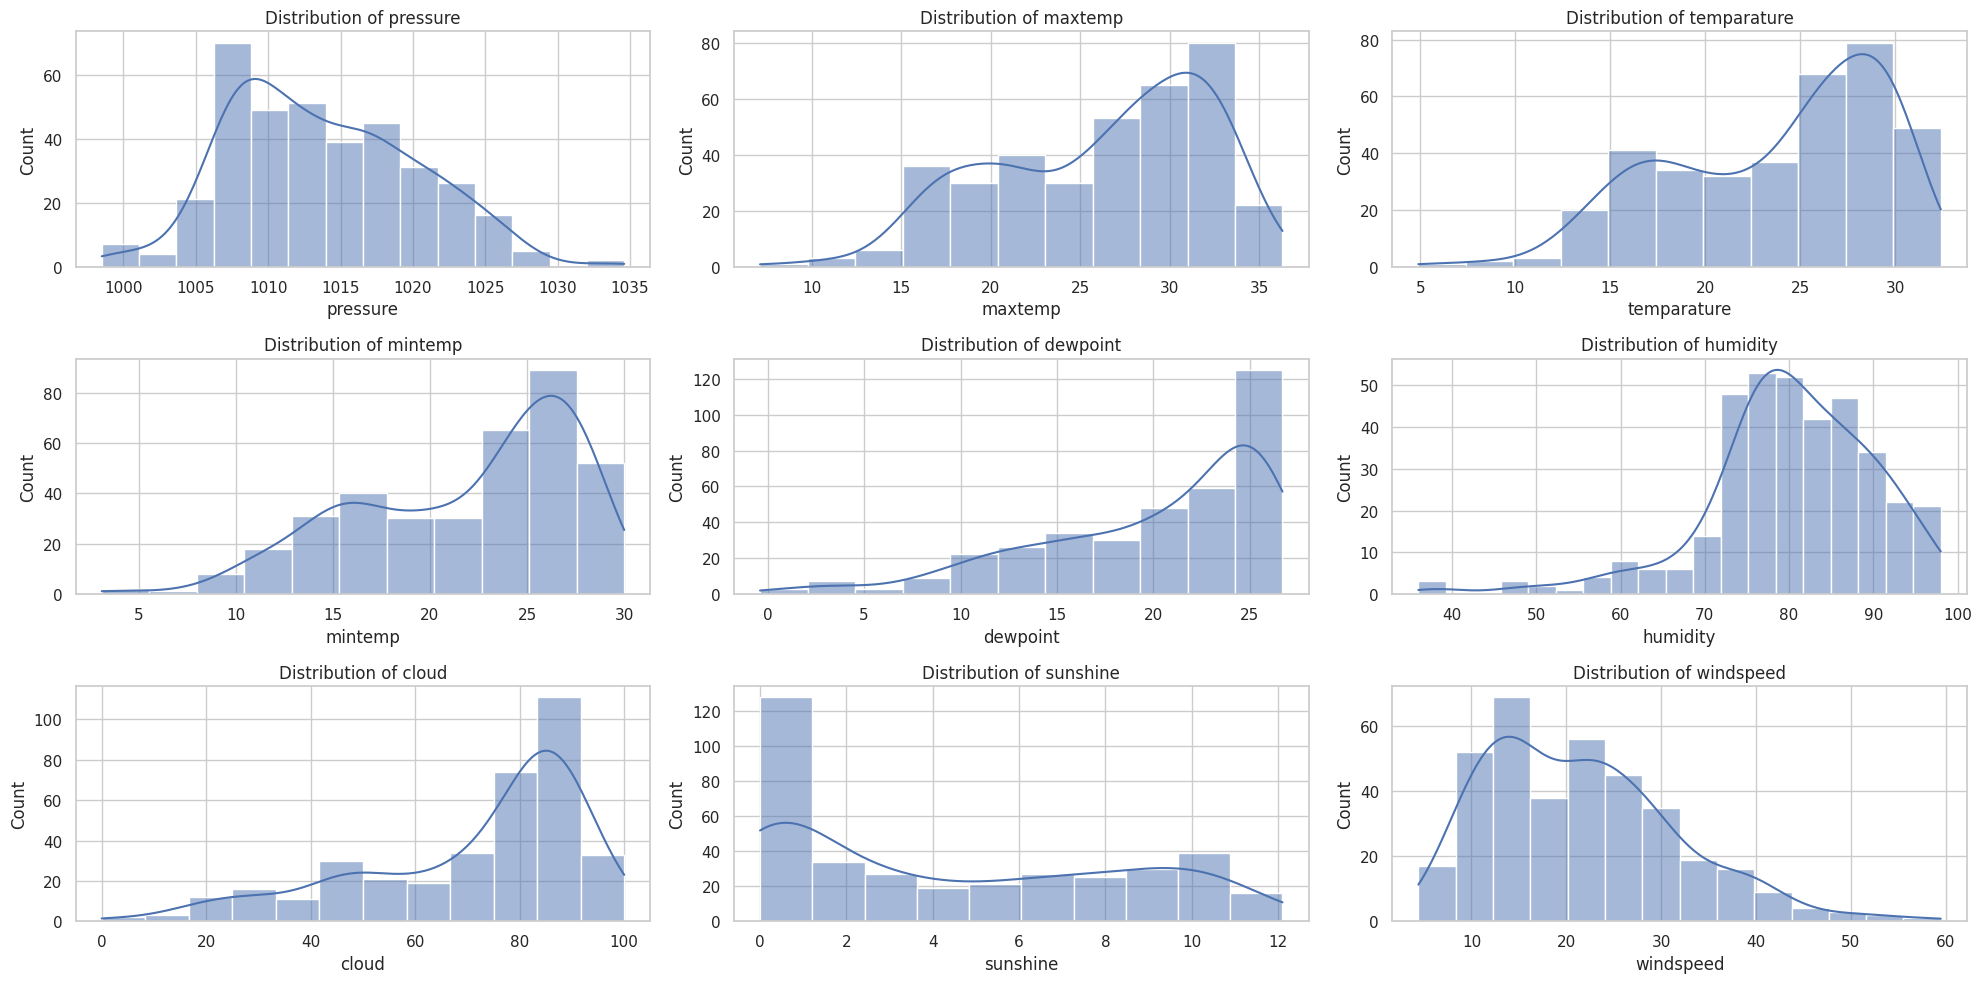

In [35]:
plt.figure(figsize=(20,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column], kde = True)
  plt.title(f"Distribution of {column}")


plt.tight_layout()
plt.show()

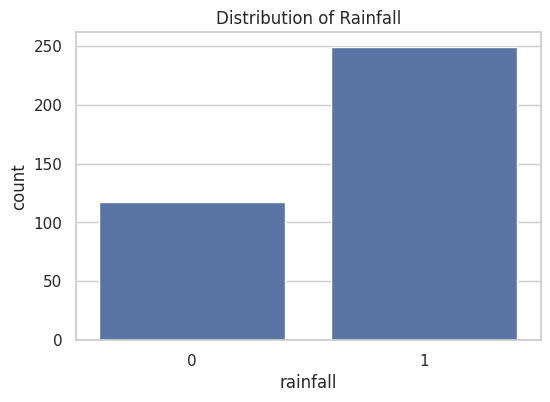

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall", data=data)
plt.title("Distribution of Rainfall")
plt.show()

As 1 has 250 datapoints and 0 has around 120 datapoints, so we need to downsample the column(dataPoints) to properly train the model.

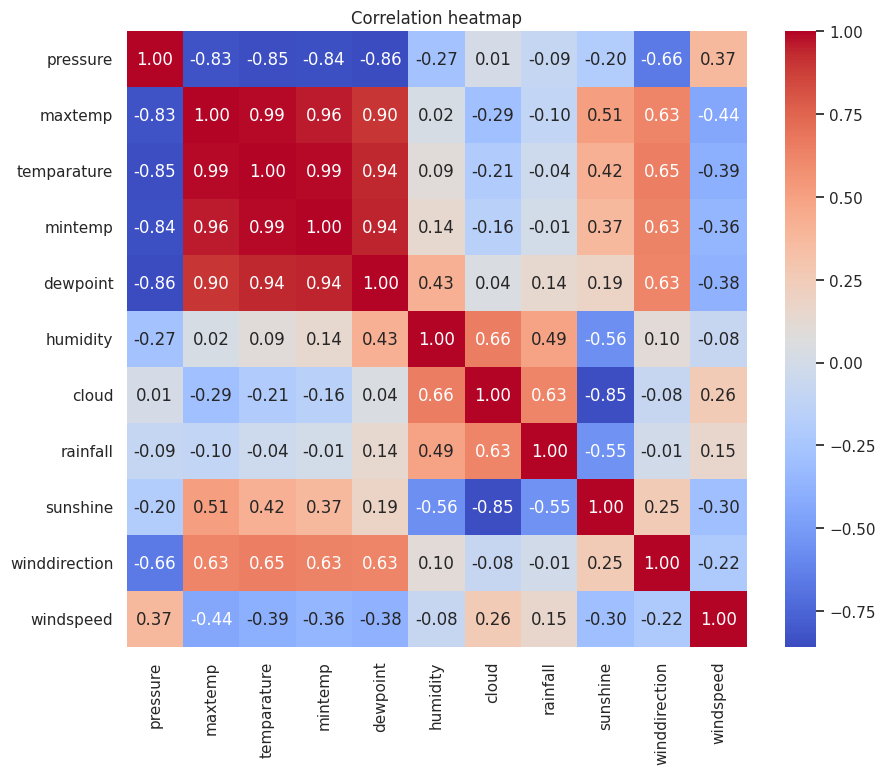

In [37]:
#observe correlation matrix by heatmaps
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

highly correlated columns lead to high colinearity which means those columns contribute the same thing to the target variable which should be avoided

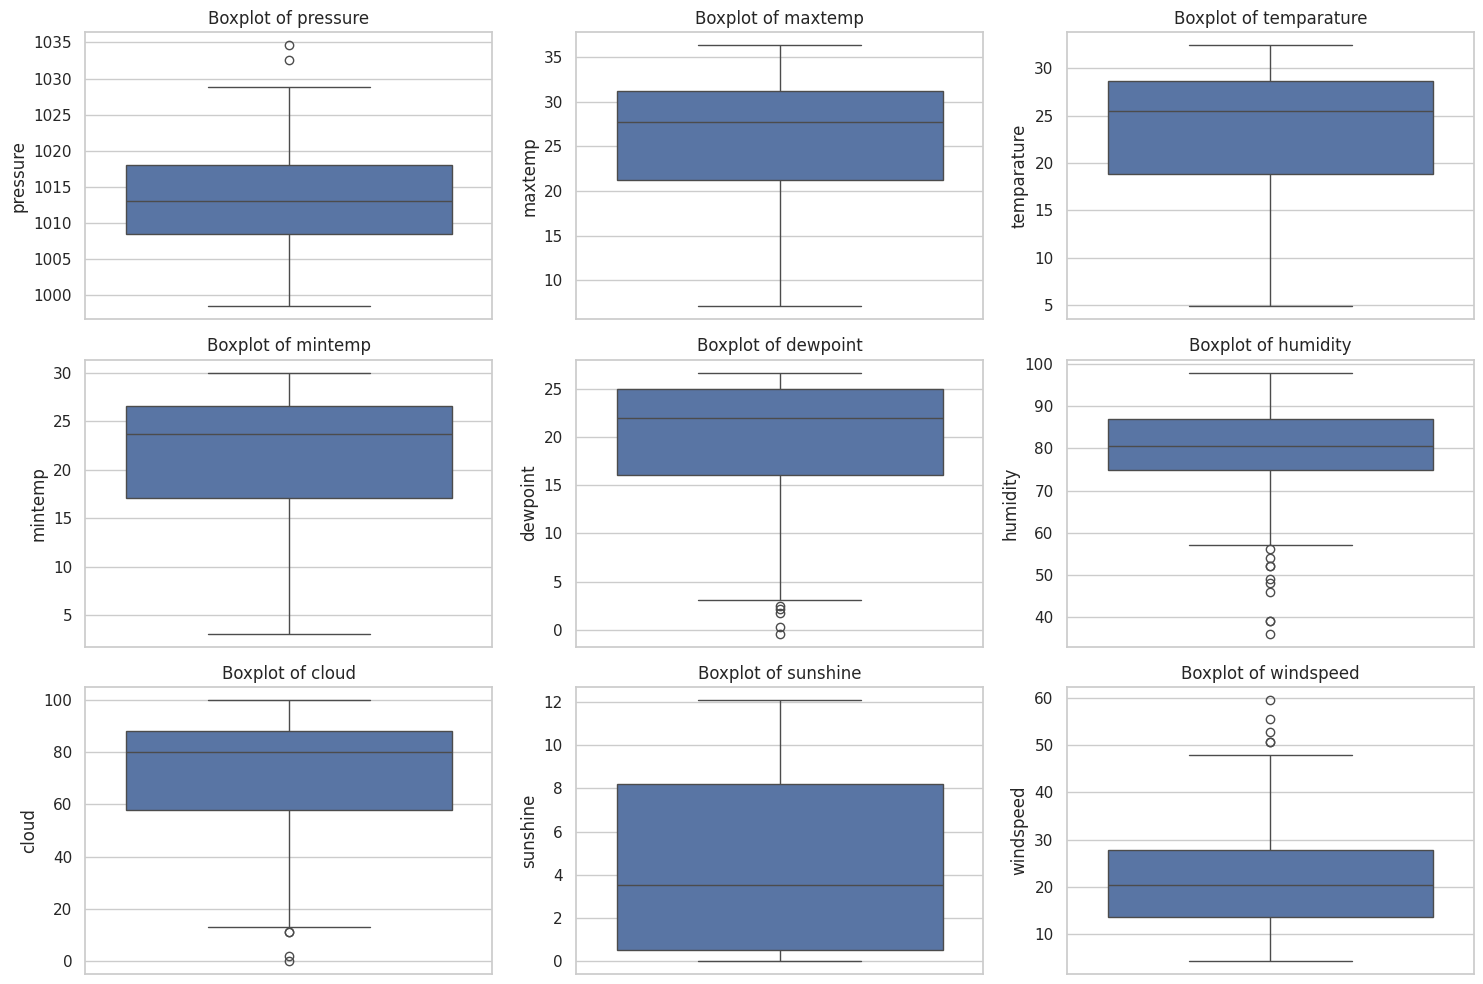

In [39]:
#identifying outliers using boxplot
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine','windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

hollow circles outside the thin horizontal lines represents outliers, as they are few in numbers so no action

**DATA PREPROCESSING**

In [40]:
#dropping highly correlated columns
data = data.drop(columns = ['maxtemp', 'temparature', 'mintemp'])



In [41]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [45]:
#downsampling
#separate majority and minority classes
print(data['rainfall'].value_counts())

#so majority is 1 and minority is 0

rainfall
1    249
0    117
Name: count, dtype: int64


In [46]:
df_majority = data[data['rainfall'] == 1]
df_minority = data[data['rainfall'] == 0]


In [47]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [48]:
#downsample majority class to minority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority),random_state=42)


replace=false makes sure to remove duplicated rows while resampling

In [49]:
df_majority_downsampled.shape

(117, 8)

In [50]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [51]:
df_downsampled.shape

(234, 8)

In [53]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [54]:
#shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [55]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [57]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [58]:
#splitting data into training data and test data
#split features and target as x and y
x = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

test_size=0.2 means 20% is testing data and remaining 80% is training data

In [60]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50,100,200],
    'max_features': ["sqrt","log2"],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [61]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Model Evaluation**

In [62]:
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=5)
print("Cross validation sscores:", cv_scores)
print("Mean cross validation score:", np.mean(cv_scores))


Cross validation sscores: [0.71052632 0.84210526 0.86486486 0.83783784 0.86486486]
Mean cross validation score: 0.8240398293029871


In [63]:
y_pred = best_rf_model.predict(x_test)
print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix", confusion_matrix(y_test, y_pred))
print("Test set Classification Report", classification_report(y_test, y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix [[17  7]
 [ 5 18]]
Test set Classification Report               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



y_test = testing part to check tuning of model
Model accuracy = 74% (not that good, changes in parameters values will increase it)

**Prediction on unknown data**

In [69]:
input = (1010.4, 20.1, 88, 79, 0.1, 78.9, 48.2)

input_df = pd.DataFrame([input], columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

print(input_df)

   pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0    1010.4      20.1        88     79       0.1           78.9       48.2


In [70]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")


Prediction result: Rainfall


In [72]:
input = (1166.2, 99.2, 53, 11, 24.1, 191, 11.8)
input_df = pd.DataFrame([input], columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: No Rainfall


In [74]:
#using pickle to save model
model_data = {"model":best_rf_model, "features_names":x.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

**Load pickle model and use for prediction**

In [75]:
import pickle
import pandas as pd

with open("rainfall_prediction_model.pkl","rb") as file:
  model_data = pickle.load(file)

best_model = model_data["model"]
features_names = model_data["features_names"]

In [76]:
input = (1166.2, 99.2, 53, 11, 24.1, 191, 11.8)

input_df = pd.DataFrame([input], columns=features_names)

prediction = best_model.predict(input_df)
print("Prediction results: ", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction results:  No Rainfall


Try:
1. Smote(oversampling)
2. PCA
3. try other models like lr